## Assignment 2

For this assignment, you will be working on Data Visualization and Machine Learning. The purpose of this assignment is to evaluate your skills in data visualization and machine learning experiments. You will be given a dataset where you will predict digits, and you will be required to train a baseline and a Logistic Regression model.

There are eight exercises that you must complete. Once you have completed these exercises, you will have the option to take on some additional challenges for those who enjoy a little extra challenge.

### On grading:

In order to pass this assignment, you must have at least 5 correct exercises among the graded ones.

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
digits = load_digits()

digits.data, digits.target, digits.images = shuffle(digits.data, digits.target, digits.images, random_state=1233)

### The data set

You can get a description of the dataset by executing the cell below:

In [9]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [11]:
first_image = digits.images[0]
print("The digits datat includes {} handwritten digits, stored as {} by {} gray-scale images".format(
digits.images.shape[0], first_image.shape[0], first_image.shape[1]))

The digits datat includes 1797 handwritten digits, stored as 8 by 8 gray-scale images


## Part 1: Data Visualization

#### Image representation

An image is a 2-dimensional array of integers in the range 0-16. The value of a cell represents the intensity of the ink at that location, i.e. how gray the cell should be rendered. A cell with a value of zero will be rendered as white, while a value of 16 signifies the darkest black. Values in between are grayscale.

In [14]:
first_image

array([[ 0.,  0.,  2., 10., 15.,  1.,  0.,  0.],
       [ 0.,  3., 16., 16., 13., 13.,  0.,  0.],
       [ 0.,  5., 16., 12.,  1., 12.,  1.,  0.],
       [ 0.,  7., 13.,  5.,  0.,  7.,  5.,  0.],
       [ 0.,  2., 14.,  0.,  0.,  7., 10.,  0.],
       [ 0.,  0., 12.,  2.,  0., 12.,  7.,  0.],
       [ 0.,  0.,  9., 12., 12., 16.,  4.,  0.],
       [ 0.,  0.,  0., 10., 16.,  6.,  0.,  0.]])

Can you guess what digit is this? Otherwise the representation below might help

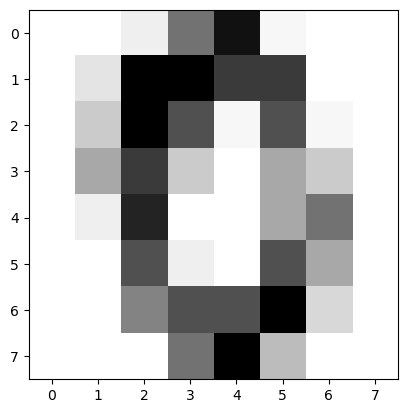

In [17]:
plt.imshow(first_image, cmap='Greys', interpolation='none');

In [19]:
first_image.reshape(-1).shape

(64,)

Labels are supplied in the `target` attribute of the `digits` object. The labels are integers corresponding to the digits.

In [22]:
digits.target

array([0, 8, 7, ..., 5, 0, 0])

### Exercise 1: Plot the first digit "8" in the dataset

When you plot the image using the `.imshow` function, use the same parameters as we used before (`cmap='Greys', interpolation='none'`).

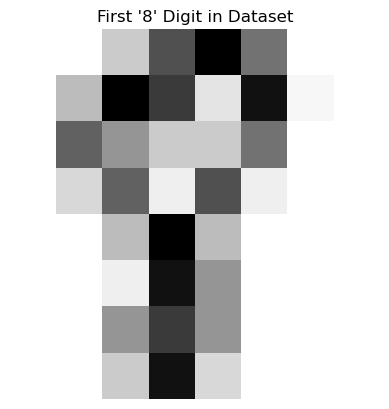

In [25]:

first_eight_index = next(index for index, label in enumerate(digits.target) if label == 8)
first_eight_image = digits.images[first_eight_index]

plt.imshow(first_eight_image, cmap='Greys', interpolation='none')
plt.title("First '8' Digit in Dataset")
plt.axis('off')
plt.show()


### Exercise 2: Average images for different classes

Plot the 10 digits in a 5x2 grid, top to bottom, left to right. I.e., start with `0` in the upper left corner, then `1` in the upper right corner, etc., until you get to `9` in the lower right corner.

But watch out, you have to print the average image of a specific class, which means that you need to get all images of that class and then, average them (`np.mean`).

Use the `fig` and `axes` data structure returned from the `plt.subplots` command. The `axes` is actually a two-dimensional array of subplots,  where subplots may be referenced by row and column indices. For instance, the plot in the upper right corner (at row 0 and column 1) can be accessed by

````
axes[0, 1]
````

The axis object supports all the usual plotting commands: `plot()`, `scatter()`, `hist()`, `imshow()`, etc.

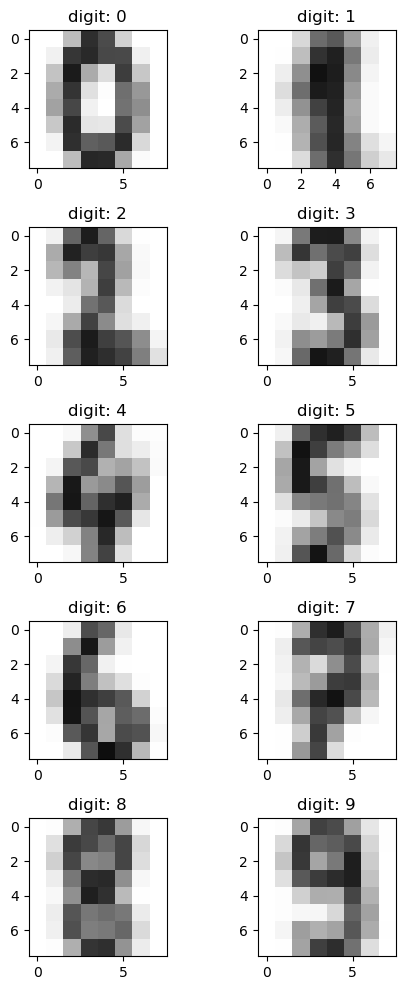

In [83]:
# grid outline of the numbers
fig, axs = plt.subplots(nrows=5, ncols=2) 
fig.set_size_inches(5, 10)

# Plot a straight line in the upper right corner.
# Replace by your own code
average_image_1 = digits.data[digits.target == 1].mean(axis=0).reshape(8, 8)  
ax = axs[0, 1]  
ax.imshow(average_image_1, cmap='gray_r',vmin=0, vmax=16)
ax.set_title("digit: 1")

ax.set_xticks([0, 2, 4, 6])
ax.set_yticks([0, 2, 4, 6])
ax.set_xticklabels([0, 2, 4, 6])
ax.set_yticklabels([0, 2, 4, 6])

for digit in range(10):
    if digit == 1:
        continue 

    average_image = digits.data[digits.target == digit].mean(axis=0).reshape(8, 8) 

    row = digit // 2
    col = digit % 2

    ax = axs[row, col]
    ax.imshow(average_image, cmap='gray_r',vmin=0, vmax=16)
    ax.set_title(f"digit: {digit}")
    ax.axis('on') 
    
plt.tight_layout()  
plt.show()   
    

## Part 2: Feature vector preparation + baseline

### Exercise 3: Flatten the images to 1-dim

You must convert the 2-dimensional images to 1-dimensional feature vectors before feeding them to the machine learning models. You can do this by reshaping the two last dimensions of each image into -1. Intuitively, you extend the rows next to each other such that the last element of the previous row is adjacent to the first element of the next row. 

As an example, after this transformation the 3 by 2 array below

In [26]:
np.array([[1,2], [3, 4], [5, 6]])

array([[1, 2],
       [3, 4],
       [5, 6]])

would become this 6 element array:

In [25]:
np.array([1,2, 3, 4, 5, 6])

array([1, 2, 3, 4, 5, 6])

**Exercise** Convert the `numbers_2d` array to a one-dimensional `numpy` array called `numbers_1d`. 

In [85]:
numbers_2d = np.array([[1,2], [3, 4], [5, 6]])

# YOUR CODE HERE
numbers_1d = numbers_2d.reshape(-1)
print(numbers_1d)

[1 2 3 4 5 6]


In [87]:
numbers_1d

array([1, 2, 3, 4, 5, 6])

**Exercise** Reshape the entire images array, which has three dimensions, to a two-dimensional array. Save the converted array as `X`. Check that 

```
X.shape
```

outputs 

```
(1797, 64)
```

Assign the target digits to a new variable called `y`. 


In [89]:
# YOUR CODE HERE
X = digits.images.reshape((digits.images.shape[0], -1))
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

### Validation

In [93]:
from sklearn.model_selection import train_test_split

### Exercise 4: Create training and testing splits from the current data set

Divide the whole data set into a training set and a testing set, using 33% of the data for testing and the remaining for training.

Please set the `random_state` attribute to `443` when creating the training/testing split.

In [96]:
#YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=443)

### Exercise 5:

Plot the class distribution by creating a histogram that shows how the classes are distributed in the train and test set.

The plots should represent the number of `0`-s, `1`-s, `2`-s, ... in the train and test data.

To ensure greater reliability of our results, it's important to have similar distributions for both training and testing.

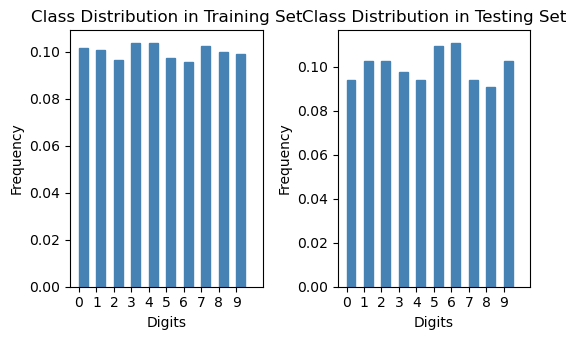

In [156]:
#YOUR CODE HERE
plt.figure(figsize=(5.5, 3.5))

#Class Distribution in Training Set
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=np.arange(11) , color= 'steelblue',edgecolor='steelblue', alpha=1,density=True,width=0.5)
plt.title('Class Distribution in Training Set')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.xticks(range(10))

# Class Distribution in Testing Set
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=np.arange(11), color= 'steelblue',edgecolor='steelblue', alpha=1,density=True,width=0.5)
plt.title('Class Distribution in Testing Set')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.xticks(range(10))

plt.tight_layout()
plt.show()



### Let's prepare a baseline

Before performing the experiments with the target classifier (e.g., Logistic Regression), it is recommended to train a baseline model to know how easy/hard the digit classification task is. Such a baseline model can also help us later evaluate our target classifier's performance. 

Scikit-learn offers a set of very simple baselines under the `sklearn.dummy.DummyClassifier` class, enabling us to compare our model against them. The baseline DummyClassifier is used the same way as any other classifier in Scikit-learn.

After training the baseline and target classifiers, if their performance on a test set were similar, we would have to run significance tests to examine whether one model is better. In this assignment, we will not perform significance testing.  

### Exercise 6: Train a baseline and check how it works

You should train a baseline on the training instances. There are several strategies that a Baseline can follow, check [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) to find the one that is relevant for this exercise. Just train a baseline with the training dataset.

In [170]:
from sklearn.dummy import DummyClassifier

### Exercise 6.1: Train the baseline

In [302]:

baseline_classifier= DummyClassifier(strategy='stratified',random_state=443)

baseline_classifier.fit(X_train, y_train)


DummyClassifier(random_state=443, strategy='stratified')

You already trained a dummy classifier (baseline). Please, get the test images and see how the model performs. Think about how it makes the predictions. If you don't know it, you can always check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

If you want the predictions to be always the same, you have to establish the `random_state` parameter in the constructor (a seed number), together with the `strategy`.

In [305]:
print (baseline_classifier.predict(X_test)[:10])
print (y_test[:10])

[1 9 7 1 3 6 0 8 7 9]
[1 3 5 6 4 3 2 5 7 4]


In [307]:
y_pred = baseline_classifier.predict(X_test)

### Exercise 6.2:

And now, please, show the performance of the model by printing the `classification_report`:

In [310]:
from sklearn.metrics import classification_report

In [318]:
#YOUR CODE HERE
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.07      0.08        56
           1       0.14      0.13      0.14        61
           2       0.12      0.10      0.11        61
           3       0.10      0.12      0.11        58
           4       0.08      0.09      0.08        56
           5       0.20      0.15      0.18        65
           6       0.03      0.03      0.03        66
           7       0.09      0.11      0.10        56
           8       0.08      0.11      0.10        54
           9       0.04      0.03      0.04        61

    accuracy                           0.09       594
   macro avg       0.10      0.09      0.09       594
weighted avg       0.10      0.09      0.09       594



You can optionally check other strategies and think about how they work. For each strategy, you can look at the f1_score with macro average `f1_score(y_true = y_test, y_pred = y_pred, average='macro')`.

In [350]:
from sklearn.metrics import f1_score
strategies = ['most_frequent', 'prior', 'stratified', 'uniform']

results = {}

for strategy in strategies:
    dummy_classifier = DummyClassifier(strategy=strategy,random_state = 443)
    
    dummy_classifier.fit(X_train, y_train)
    
    y_pred = dummy_classifier.predict(X_test)
    
    f1 = f1_score(y_true = y_test, y_pred = y_pred, average='macro')
    
    results[strategy] = f1

for strategy, f1_score in results.items():
    print(strategy,f1_score)


most_frequent 0.017791411042944787
prior 0.017791411042944787
stratified 0.09479679924421427
uniform 0.09821324737007193


### Exercise 7: Train Logistic Regression

In this exercise you will train a Logistic Regression using the `liblinear` solver and setting the `random_state` to `443`.

In [354]:
from sklearn.linear_model import LogisticRegression

In [355]:
#YOUR CODE HERE
log_reg = LogisticRegression(solver='liblinear', random_state=443)
log_reg.fit(X_train, y_train)
y_pred_lr= log_reg.predict(X_test)

And let's see its results:

In [108]:
print (classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.94      0.95      0.94        61
           2       1.00      0.95      0.97        61
           3       0.92      0.95      0.93        58
           4       0.96      0.96      0.96        56
           5       0.97      0.97      0.97        65
           6       0.98      0.98      0.98        66
           7       0.98      0.98      0.98        56
           8       0.85      0.93      0.88        54
           9       0.95      0.90      0.92        61

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.96      0.95      0.95       594



### Exercise 8:

It's clear that the Logistic Regression model outperforms the baseline model. Can you shed any light on why this might be the case?

Upon examining the baseline evaluation, it's apparent that the model does well with some digits, but struggles with others. Can you offer any insight into this?

In contrast, the logistic regression evaluations reveal that the model performs almost equally on all digits but has difficulty in predicting the digit "8". Is there a reason for this?

Please answer this question briefly (PRESS ENTER TO WRITE)

No more than ten sentences.

The Logistic Regression model outperforms the baseline because it learns from training data, capturing patterns rather than relying on simplistic rules. The baseline model's uneven performance across digits indicates a tendency to predict the most frequent classes, neglecting less common ones. 

Logistic Regression performs well on most digits but struggles with "8," likely due to its visual similarity to "0" and "6," which can confuse the model. Additionally, if "8" is underrepresented in the training data, the model may fail to learn its features effectively.

-----

# Extra challenge (not graded)

Everything that is below here is not graded. It is completely optional.

------

### Visualization of weights

Can you visualize the weights of the logistic regression (LR)? How can you visualize them? There are different things you should keep in mind. First, as the last LR model we trained was a multiclass LR, the array to multiply with the input will be a bit more complex. Please look at the variable that contains the classifier (let's suppose we called lr) and check these two attributes:

  * `lr.coef_`: Weights of the LR model
  * `lr.classes_`: Labels of the classes

Remember how we built a representation for each image (Exercise 3). For visualization purposes it might be relevant to reshape the weight matrix to its initial shape (`8x8`). You could build a visualization for the weights of each class, in a similar way that you did it in exercise 2.

(10, 64)


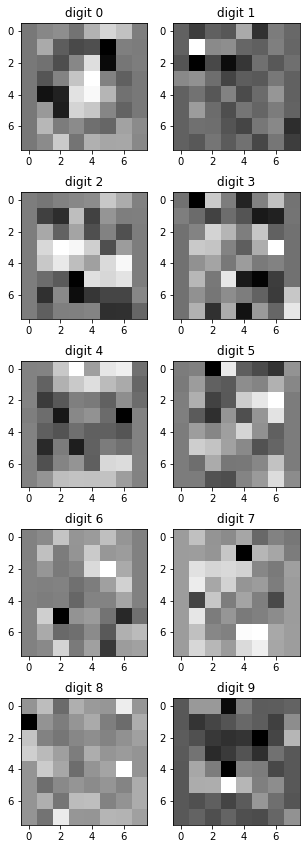

In [114]:
#YOUR CODE HERE



### Machine Learning

Can you do what we did but with the `Labeled Faces in the Wild` data set? What is the highest accuracy that you can get? How good are those models compared to a baseline?

You may want to train more complex models, such as a Support Vector Machine or a Multilayer Perceptron.

In [134]:
from sklearn.datasets import fetch_lfw_people

In [135]:
#Obtained and modified from https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 3023
n_features: 1850
n_classes: 62


In [136]:
X.shape, y.shape

((3023, 1850), (3023,))

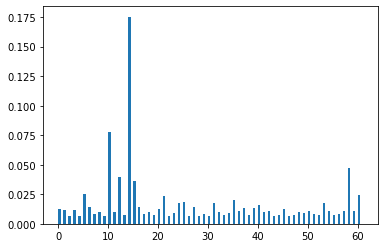

In [137]:
tr_prb = plt.hist(y, bins=np.arange(n_classes), width=0.5, density=True)


In [130]:
target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

For each classification model, you can look at the f1_score with macro average `f1_score(y_true = y_test, y_pred = y_pred, average='weighted')`.

In [139]:
#YOUR CODE HERE



dummy classifier with prior strategy: f1-score=0.049585472314492
logistic regression with liblinear solver: f1-score=0.5399270026460602
linear svm: f1-score=0.5492625408799304


### Visuailzation

Can you make a script that, given a time range (e.g. from 2020-07-01 to 2020-09-01), you plot the number of worldwide Covid-19 infections per day?

You can use the information from this website: https://github.com/owid/covid-19-data/tree/master/public/data

I would like something similar to what could be seen on the tabloid BT (the image is included below). It does not need to be the same, but it would be nice to make it similar.

<!--<img src="assignment_2_img.png"/>-->

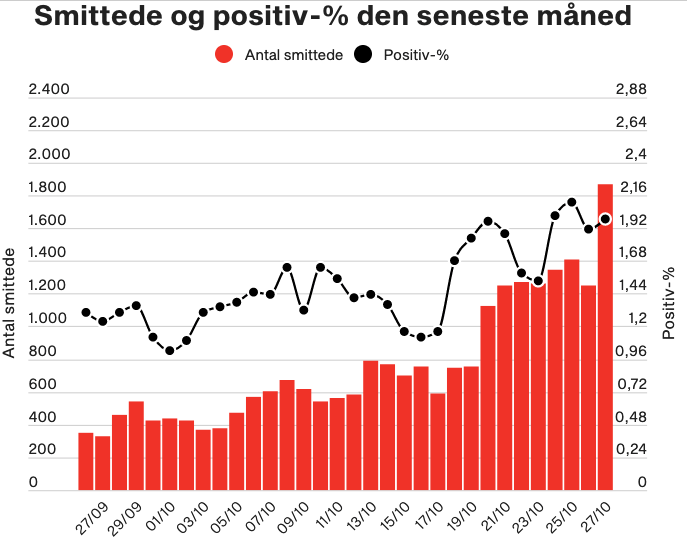

In [35]:
#YOUR CODE HERE

Can you, besides, make the same plot but including a list of countries and showing the values for each country?

In [36]:
#YOUR CODE HERE

Can you make a similar plot with vaccinations?

In [37]:
#YOUR CODE HERE